# IBM HR Analytics: Employee Turnover Analysis

Welcome to this project where we analyze employee turnover using IBM's HR Analytics dataset. The goal is to identify key factors that contribute to employee attrition and provide actionable insights to enhance employee retention strategies.

## **Project Objectives**
- **Enhance Employee Retention**: Identify factors driving turnover to develop targeted retention strategies.
- **Optimize HR Strategies**: Use data-driven insights to refine HR policies and interventions.
- **Reduce Costs**: Minimize expenses related to recruitment and training by retaining valuable employees.
- **Improve Decision-Making**: Provide actionable insights to support strategic HR decisions.

## **Stakeholder Questions**
1. **Tenure and Age**: What is the typical tenure and age range of employees leaving the organization?
2. **Demographics**: Are there trends based on gender or marital status?
3. **Job Satisfaction and Environment**: How do satisfaction levels and work-life balance correlate with turnover?
4. **Performance and Compensation**: Do performance ratings and income levels impact turnover rates?
5. **Departmental Trends**: Which departments are most affected by turnover?
6. **Managerial Support**: Does tenure with a manager influence employee decisions to stay or leave?


## 2. Setup and Installation

In this section, we import all the necessary libraries required for data manipulation, visualization, and machine learning. Additionally, we set up configurations such as plot styles and warning filters to ensure our notebook runs without interruptions.


In [3]:
# Ensuring All Dependencies Are Imported at the Beginning

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set seaborn style
sns.set(style='whitegrid')


In [5]:
# !pip install xgboost imbalanced-learn

## 3. Data Loading

In this section, we load the IBM HR Analytics dataset into our environment. We'll read the dataset from Google Drive (or upload it directly to Colab) and perform initial inspections to understand its structure and contents.


In [9]:

import os

# Define the new dataset path
dataset_path = '/kaggle/input/hr-employee-attrition-datasets'

# Optional: List files to confirm
files = os.listdir(dataset_path)
print("Files in the dataset directory:")
for file in files:
    print(file)

# Load the dataset (replace 'HR_comma_sep.csv' with your actual filename)
data_file = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'  # Update this if your file has a different name
data_path = os.path.join(dataset_path, data_file)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data_path)

# Display the first few rows to verify
df.head()



Files in the dataset directory:
WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 4. Data Exploration and Visualization

In this section, we'll perform exploratory data analysis (EDA) to understand the underlying patterns and relationships within the IBM HR Analytics dataset. EDA helps in identifying important features, detecting anomalies, and forming hypotheses for further analysis.

### **Key Activities:**
1. **Inspect the Data Structure**
   - View the first few rows of the dataset.
   - Check the data types and identify numerical vs. categorical features.
2. **Summary Statistics**
   - Generate descriptive statistics for numerical features.
3. **Missing Values Analysis**
   - Identify features with missing values and assess their impact.
   - Visualize missing data to spot patterns.
4. **Univariate Analysis**
   - Analyze the distribution of individual features.
5. **Bivariate Analysis**
   - Explore relationships between features and the target variable (`Attrition`).
6. **Correlation Analysis**
   - Compute and visualize the correlation matrix to identify highly correlated features.


First five rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Missing Values in Each Feature:


,Missing Values,Percentage


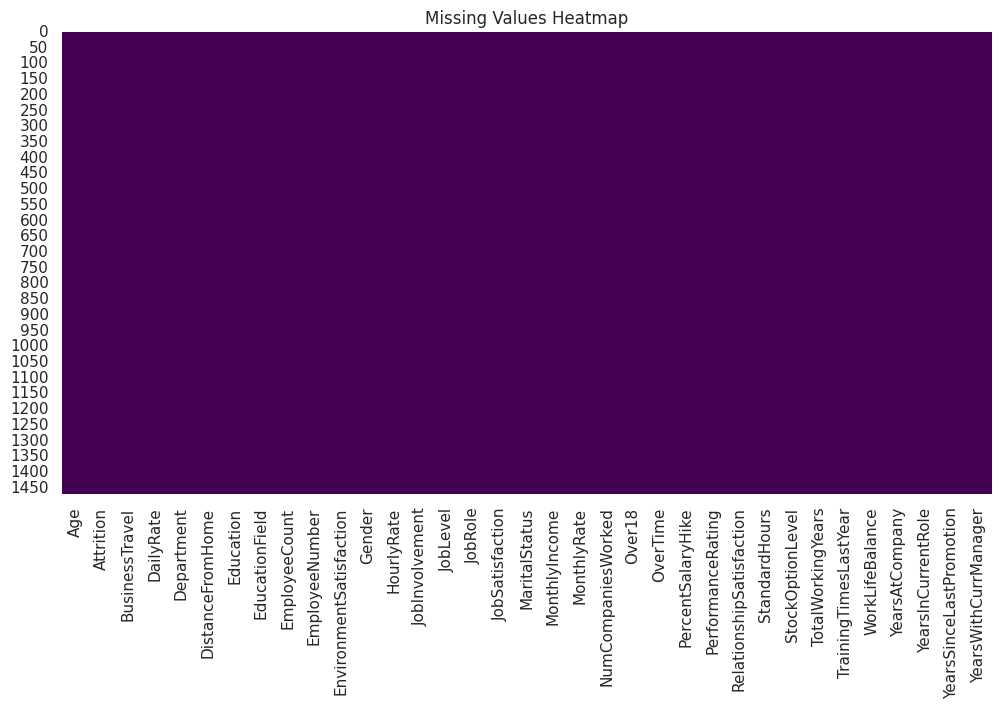

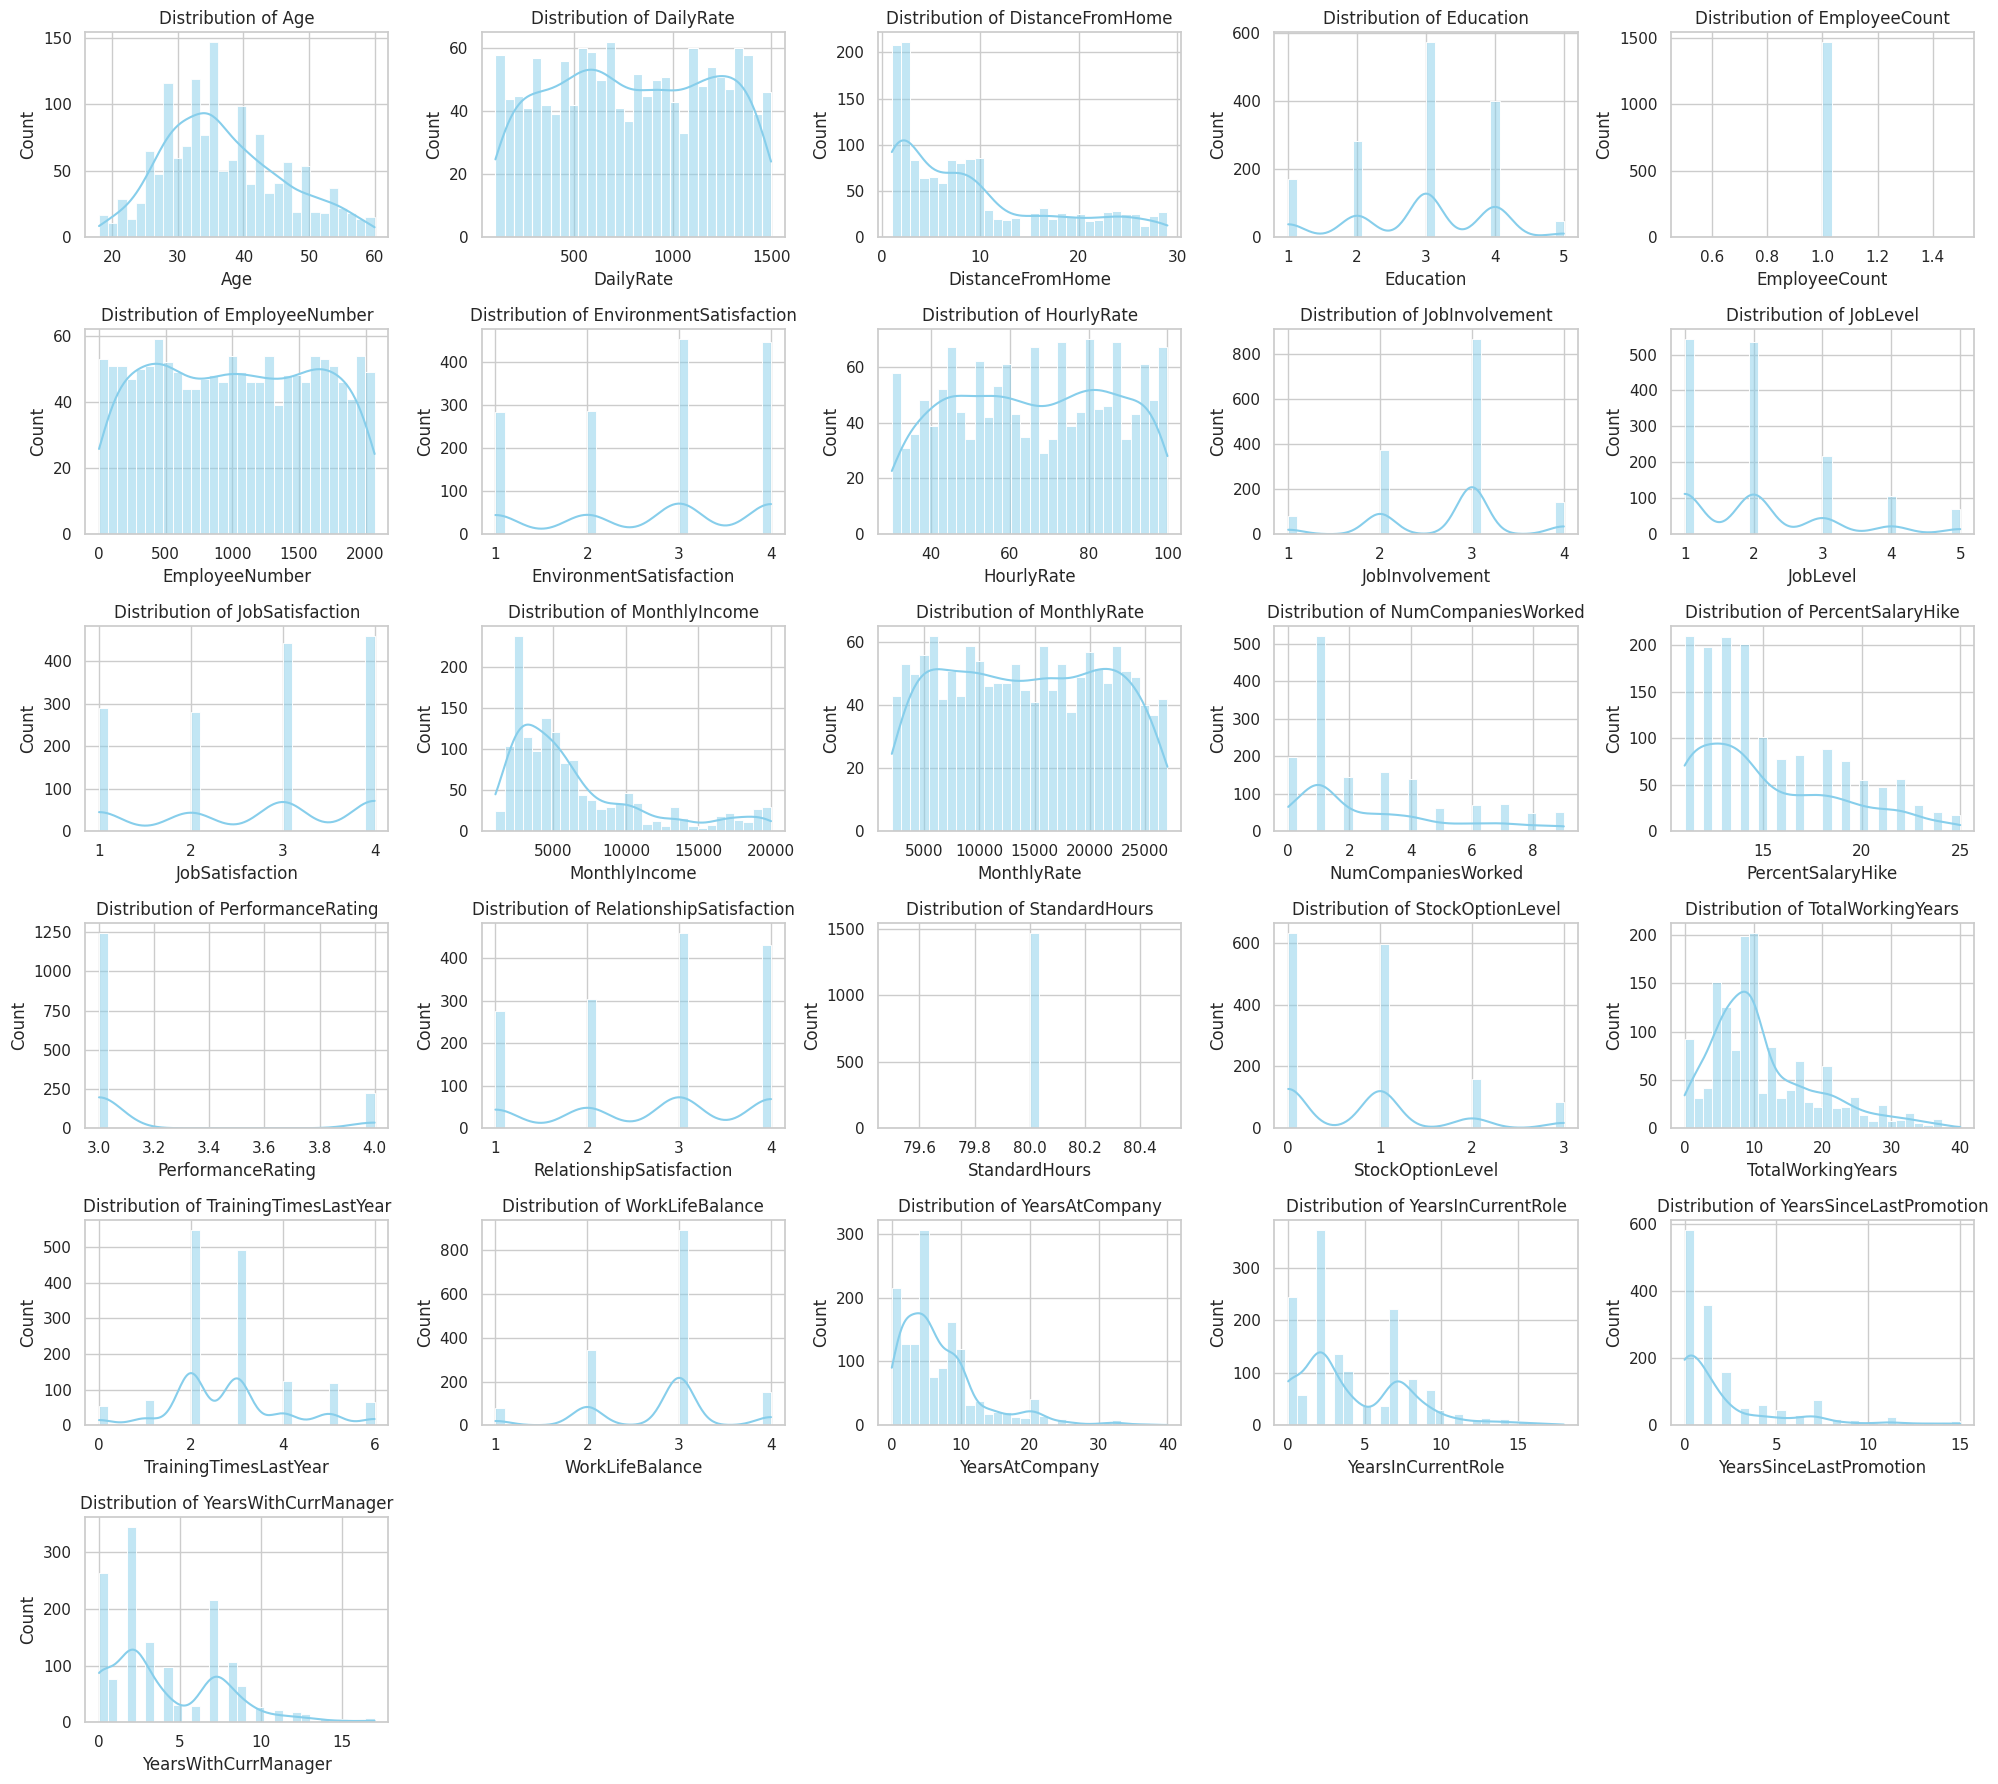

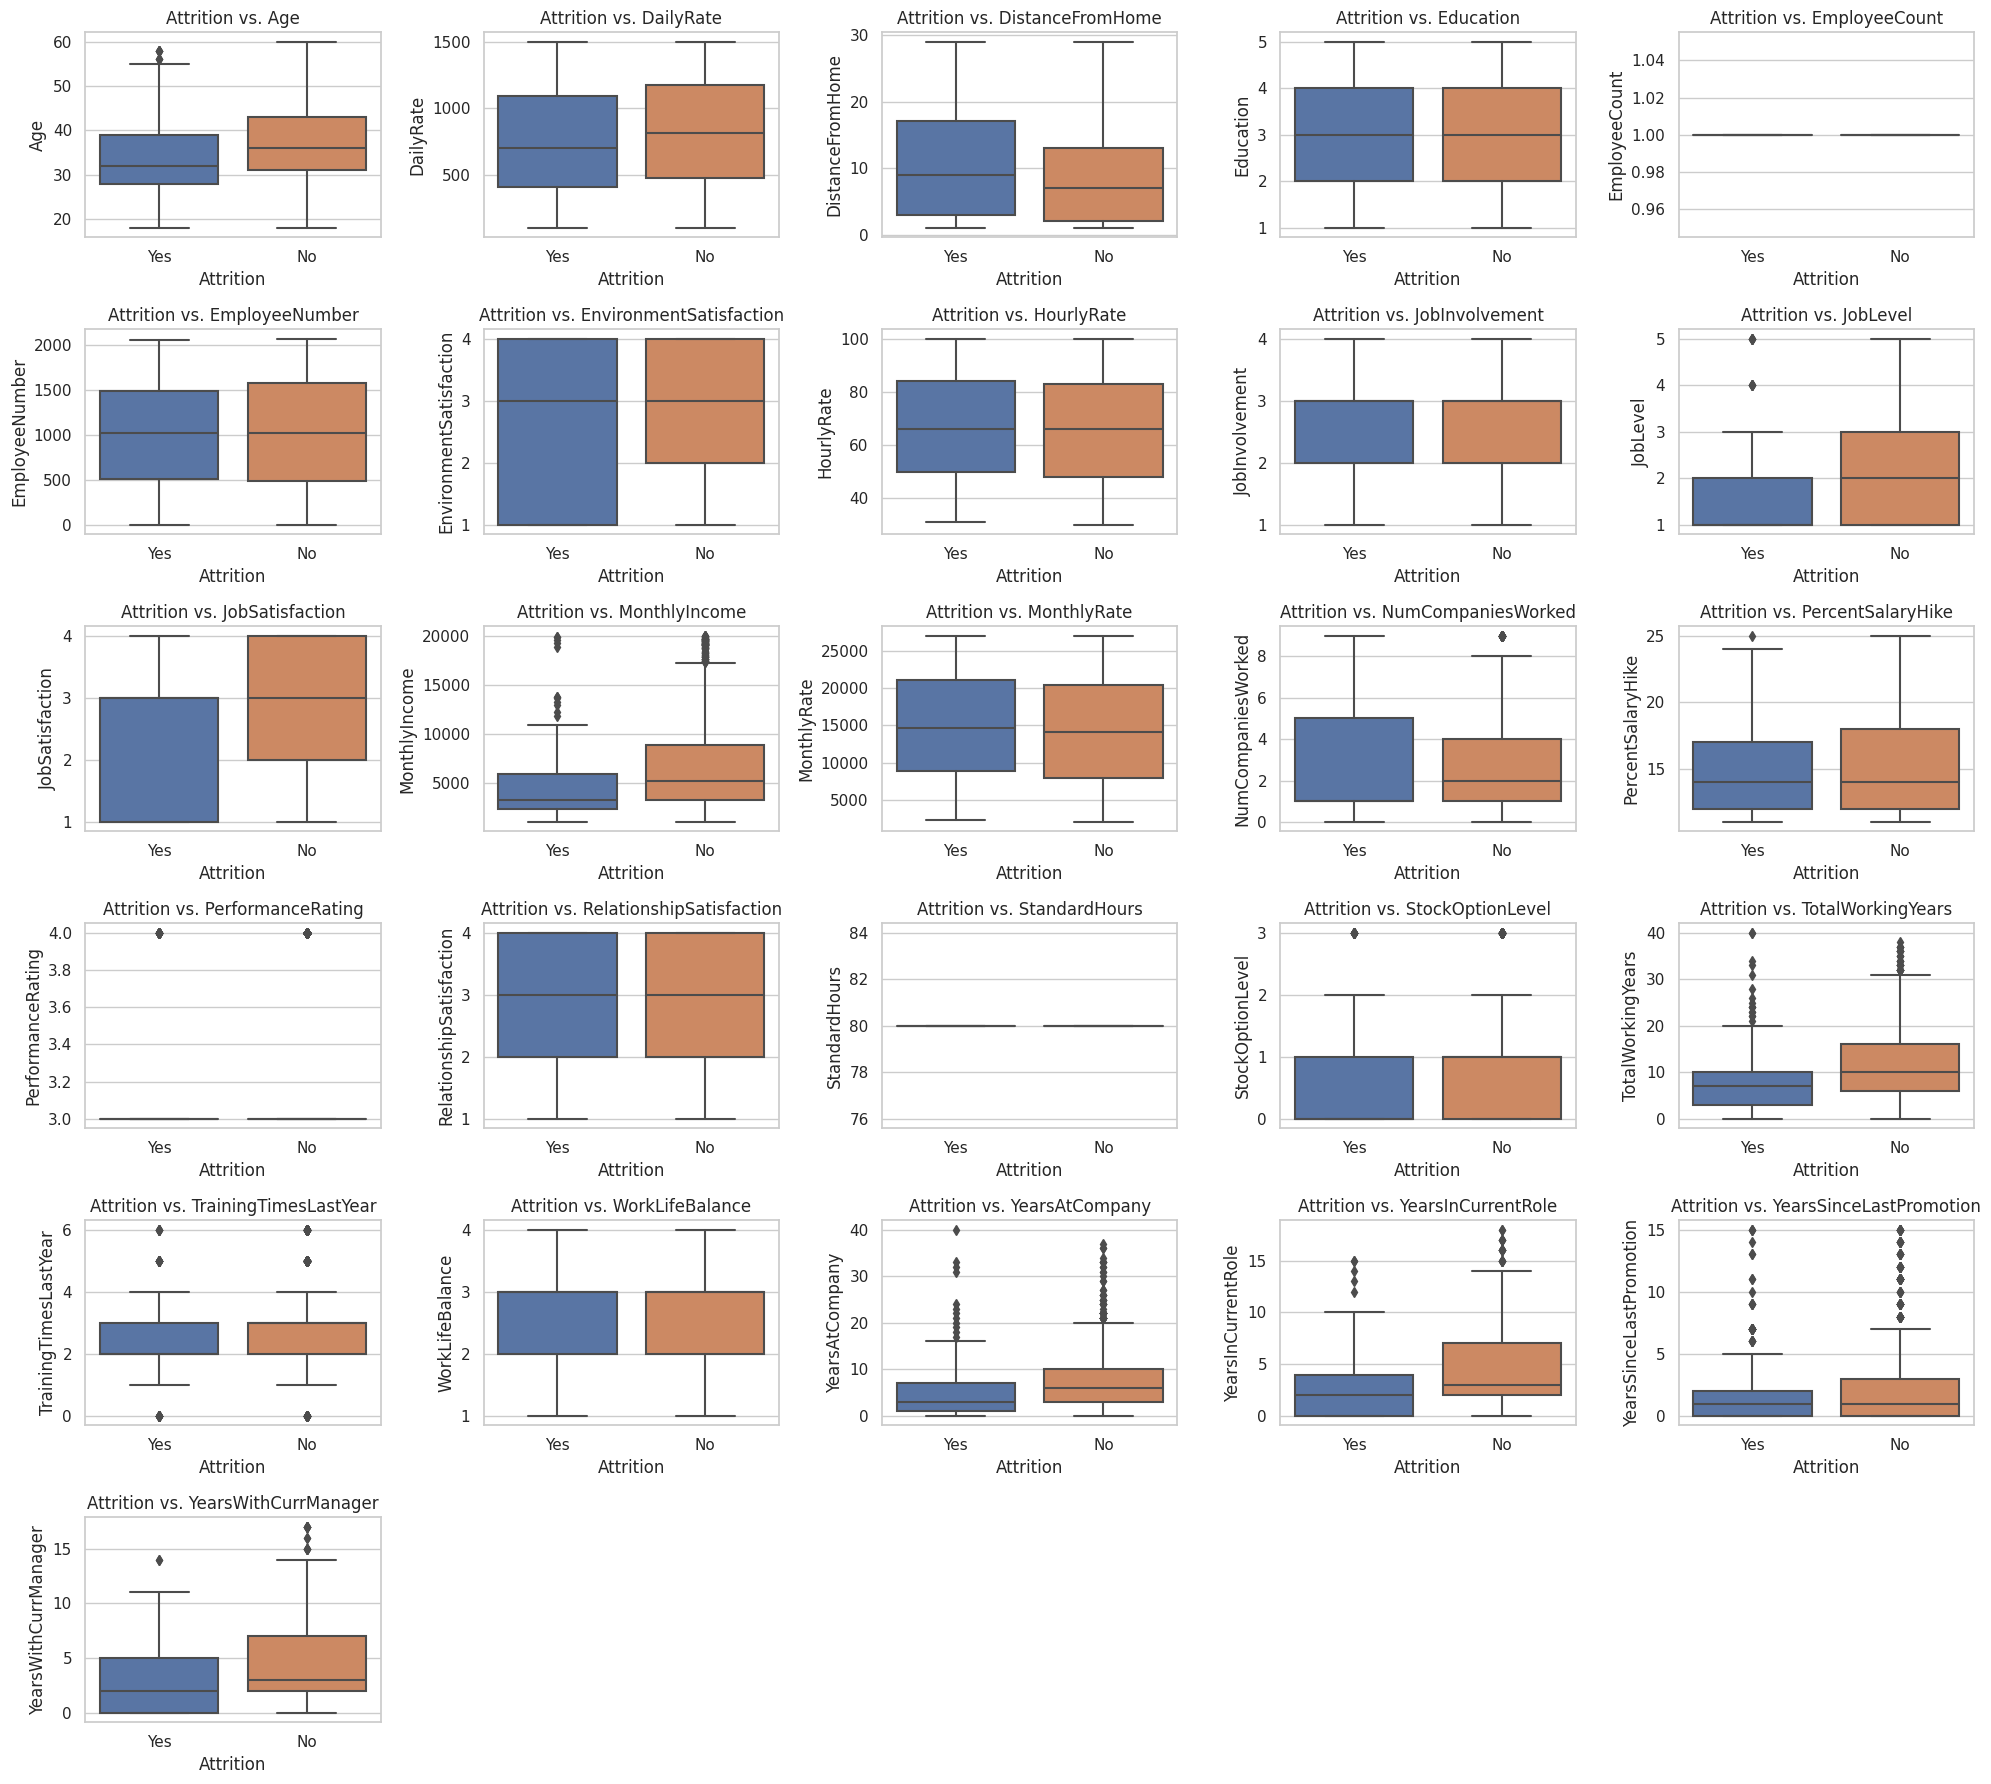

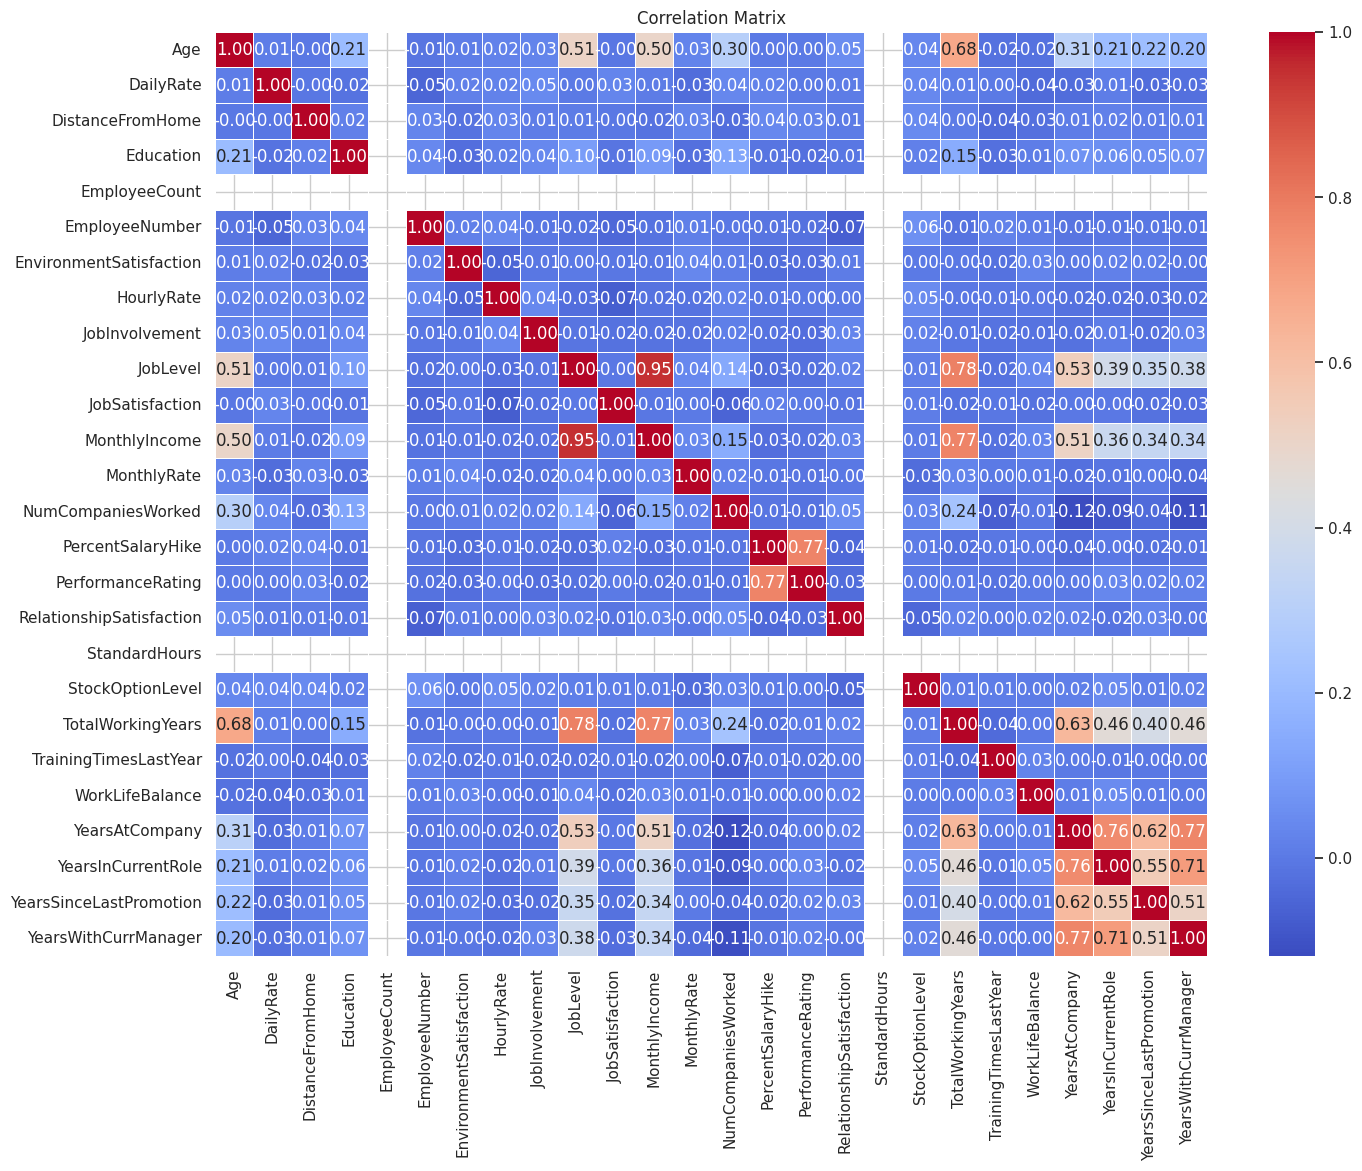

In [10]:
# Step 4: Data Exploration and Visualization

import math  # Ensure math is imported at the beginning

# 4.1 Inspect the Data Structure
print("First five rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

# 4.2 Summary Statistics
print("\nSummary Statistics for Numerical Features:")
display(df.describe())

# 4.3 Missing Values Analysis
print("\nMissing Values in Each Feature:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
display(missing_df[missing_df['Missing Values'] > 0])

# 4.4 Visualizing Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 4.5 Univariate Analysis: Distribution of Numerical Features

# Identify all numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of plots
num_features = len(numerical_features)

# Define the number of columns for subplots
cols = 5

# Calculate the number of rows needed
rows = math.ceil(num_features / cols)

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(cols * 4, rows * 3))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

# 4.6 Bivariate Analysis: Attrition vs. Numerical Features

plt.figure(figsize=(cols * 4, rows * 3))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(f'Attrition vs. {feature}')
    plt.tight_layout()
plt.show()

# 4.7 Correlation Analysis

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### 5.1 Handling Missing Values

In this sub-step, we'll address the missing values identified during the exploratory data analysis (Step 4). Proper handling of missing data is crucial to prevent biases and ensure the integrity of our model.

**Key Actions:**
- **Identify Missing Values:** Review the missing values table from Step 4.3.
- **Impute or Remove Missing Values:** Decide whether to impute missing values with statistical measures (mean, median, mode) or remove columns/features with excessive missing data.
- **Apply Imputation Techniques:** Use `SimpleImputer` from `sklearn` for imputing missing values.


In [11]:
# 5.1 Handling Missing Values

from sklearn.impute import SimpleImputer

# Display the missing values again for reference
print("Missing Values in Each Feature:")
display(missing_df[missing_df['Missing Values'] > 0])

# List of columns to drop based on missing values percentage (e.g., >30%)
# You can adjust the threshold as needed
threshold = 30
cols_to_drop = missing_df[missing_df['Percentage'] > threshold].index.tolist()

if cols_to_drop:
    print(f"\nDropping columns with more than {threshold}% missing values:")
    print(cols_to_drop)
    df.drop(columns=cols_to_drop, inplace=True)
else:
    print("\nNo columns exceed the missing values threshold. Proceeding to imputation.")

# Update the list of columns with missing values after dropping
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Impute remaining missing values
if not missing_df.empty:
    print("\nImputing missing values...")
    # For numerical columns, use median
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    num_imputer = SimpleImputer(strategy='median')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # For categorical columns, use the most frequent value (mode)
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    print("Missing values imputed successfully.")
else:
    print("\nNo missing values to impute.")


Missing Values in Each Feature:


,Missing Values,Percentage



No columns exceed the missing values threshold. Proceeding to imputation.

No missing values to impute.


### 5.2 Encoding Categorical Variables

In this sub-step, we'll transform categorical variables into numerical formats to make them compatible with machine learning models. Categorical variables can be nominal (no inherent order) or ordinal (with an inherent order). Depending on the nature of the categorical data, different encoding techniques are appropriate.

**Key Actions:**
1. **Identify Categorical Features:**
   - Determine which features are categorical and need encoding.
2. **Determine Encoding Techniques:**
   - **One-Hot Encoding:** Suitable for nominal categorical variables with no inherent order.
   - **Label Encoding:** Suitable for ordinal categorical variables with a clear order.
3. **Apply Encoding:**
   - Use `pd.get_dummies()` for one-hot encoding.
   - Use `LabelEncoder` from `sklearn` for label encoding.
4. **Handle the Target Variable (`Attrition`):**
   - Encode the target variable into binary format (`Yes`=1, `No`=0).


In [12]:
# 2.1 Re-executing Encoding Categorical Variables (Step 5.2)

from sklearn.preprocessing import LabelEncoder

# Identify all categorical columns again to ensure none are missed
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# 1. Drop Redundant Columns
# 'Over18' has only one unique value ('Y'), so it's redundant
if 'Over18' in categorical_cols:
    df.drop(columns=['Over18'], inplace=True)
    categorical_cols.remove('Over18')
    print("\nDropped 'Over18' column as it contains only one unique value.")

# 2. Encode Remaining Categorical Variables

# After dropping 'Over18', update the list of categorical columns
print("\nRemaining Categorical Columns:", categorical_cols)

# Separate binary and nominal categorical columns
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
nominal_cols = [col for col in categorical_cols if df[col].nunique() > 2]

print("\nBinary Categorical Columns:", binary_cols)
print("Nominal Categorical Columns:", nominal_cols)

# 2.a. Label Encoding for Binary Categorical Variables
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded '{col}' with Label Encoding.")

# 2.b. One-Hot Encoding for Nominal Categorical Variables
if nominal_cols:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
    print("\nOne-Hot Encoding applied to columns:", nominal_cols)
else:
    print("\nNo nominal categorical columns to encode.")

# 3. Encode the Target Variable ('Attrition') if not already encoded
# (Assuming 'Attrition' has already been encoded in previous steps)

# Verify the encoding
print("\nFirst five rows after encoding categorical variables:")
display(df.head())


Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Dropped 'Over18' column as it contains only one unique value.

Remaining Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Binary Categorical Columns: ['Attrition', 'Gender', 'OverTime']
Nominal Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
Encoded 'Attrition' with Label Encoding.
Encoded 'Gender' with Label Encoding.
Encoded 'OverTime' with Label Encoding.

One-Hot Encoding applied to columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

First five rows after encoding categorical variables:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,False,True,False,False,False,False,False,False,True,False


### 5.3 Scaling Numerical Features

In this sub-step, we'll scale the numerical features to ensure that all variables contribute equally to the machine learning models. Scaling is essential for algorithms that compute distances or rely on gradient descent optimization, such as Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Neural Networks.

**Key Actions:**
1. **Identify Numerical Features:**
   - Determine which features are numerical and require scaling.
2. **Choose Scaling Technique:**
   - **Standard Scaling (Z-score Normalization):** Centers the data around the mean with a unit standard deviation.
   - **Min-Max Scaling:** Scales the data to a fixed range, typically [0, 1].
   - **Robust Scaling:** Uses statistics that are robust to outliers (e.g., median and IQR).
3. **Apply Scaling:**
   - Use `StandardScaler` or `MinMaxScaler` from `sklearn.preprocessing`.
4. **Integrate Scaling into a Pipeline:**
   - Incorporate scaling into the machine learning pipeline to ensure that scaling parameters are learned from the training data only.


In [13]:
# 5.3 Scaling Numerical Features

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns (excluding the target variable 'Attrition')
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Attrition')  # Exclude target variable

print("Numerical Columns to Scale:", numerical_cols)

# Choose the scaling technique
# Option 1: Standard Scaling
scaler = StandardScaler()

# Option 2: Min-Max Scaling
# scaler = MinMaxScaler()

# Fit the scaler on the numerical features and transform
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nScaling applied successfully. Here's a preview of the scaled numerical features:")
display(df[numerical_cols].head())


Numerical Columns to Scale: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Scaling applied successfully. Here's a preview of the scaled numerical features:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,-1.224745,1.383138,0.379672,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,0.816497,-0.240677,-1.026167,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,0.816497,1.284725,-1.026167,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-1.224745,-0.486709,0.379672,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,0.816497,-1.274014,0.379672,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### 6.1 Creating New Features

Feature engineering involves creating new features from the existing data to provide additional insights and improve the performance of machine learning models. In this sub-step, we'll explore potential new features that can be derived from the current dataset.

**Key Actions:**
1. **Identify Potential Features to Create:**
   - **Tenure Metrics:** Combine related features to create more meaningful metrics.
   - **Interaction Terms:** Capture the interaction between two or more features.
   - **Aggregated Features:** Summarize information from multiple features.
2. **Implement Feature Creation:**
   - Use arithmetic operations or domain knowledge to create new features.
3. **Evaluate the Impact of New Features:**
   - Analyze the correlation of new features with the target variable.
   - Visualize distributions to ensure the new features are meaningful.


In [14]:
# 6.1 Creating New Features (Revised)

# Example Feature 1: TotalYears (Total Working Years + Years At Company)
df['TotalYears'] = df['TotalWorkingYears'] + df['YearsAtCompany']

# Example Feature 2: AverageMonthlyIncome (MonthlyIncome / Months in a Year)
df['AverageMonthlyIncome'] = df['MonthlyIncome'] / 12

# Example Feature 3: IncomePerJobLevel (MonthlyIncome / JobLevel)
# To avoid division by zero, ensure JobLevel is not zero
df['IncomePerJobLevel'] = df.apply(
    lambda row: row['MonthlyIncome'] / row['JobLevel'] if row['JobLevel'] > 0 else row['MonthlyIncome'],
    axis=1
)

# Example Feature 4: YearsSinceLastPromotionRatio (YearsSinceLastPromotion / YearsAtCompany)
# To avoid division by zero, assign 0 where YearsAtCompany is 0
df['YearsSinceLastPromotionRatio'] = df.apply(
    lambda row: row['YearsSinceLastPromotion'] / row['YearsAtCompany'] if row['YearsAtCompany'] > 0 else 0,
    axis=1
)

# Example Feature 5: HasOverTime (Directly from 'OverTime' column)
# Since 'OverTime' is already binary, use it directly without creating 'HasOverTime'
# Alternatively, if you still want to create 'HasOverTime', it would mirror 'OverTime'
# Here, we'll skip creating 'HasOverTime' to avoid redundancy.

# Display the first five rows to verify new features
print("First five rows after feature creation:")
display(df[['TotalYears', 'AverageMonthlyIncome', 'IncomePerJobLevel', 'YearsSinceLastPromotionRatio', 'OverTime']].head())


First five rows after feature creation:


,TotalYears,AverageMonthlyIncome,IncomePerJobLevel,YearsSinceLastPromotionRatio,OverTime
0,-0.586256,-0.009029,-0.108350,0.000000,1.591746
1,0.323996,-0.024310,-0.291719,-0.754779,-0.628241
2,-1.694502,-0.078138,-0.937654,0.000000,1.591746
3,-0.259695,-0.063636,-0.763634,1.556960,1.591746
4,-1.496507,-0.053738,-0.644858,0.000000,-0.628241


### 6.2 Feature Selection

After creating new features, it's crucial to select the most relevant ones for your machine learning model. Feature selection helps in reducing overfitting, improving model performance, and decreasing computational cost.

**Key Actions:**
1. **Correlation Analysis:**
   - Re-examine the correlation matrix to identify highly correlated features.
2. **Variance Threshold:**
   - Remove features with low variance as they provide little information.
3. **Feature Importance:**
   - Use models like Random Forest to determine feature importance.
4. **Recursive Feature Elimination (RFE):**
   - Iteratively select features by recursively considering smaller sets.


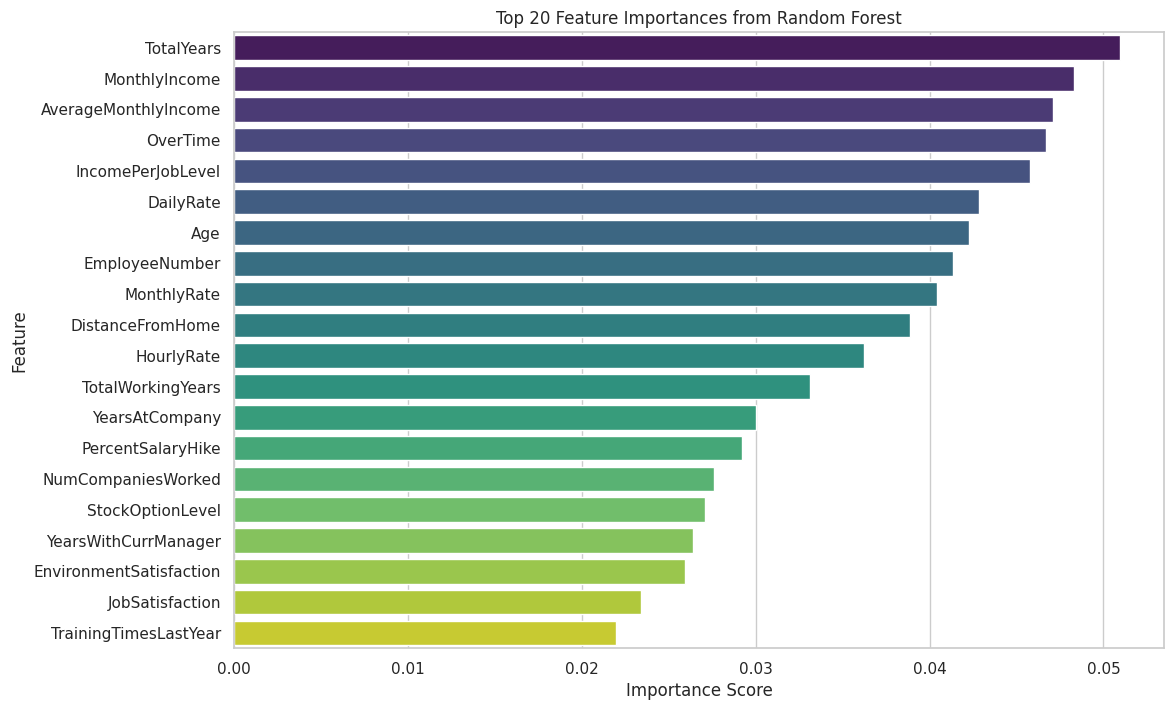

Selected Top Features: ['TotalYears', 'MonthlyIncome', 'AverageMonthlyIncome', 'OverTime', 'IncomePerJobLevel', 'DailyRate', 'Age', 'EmployeeNumber', 'MonthlyRate', 'DistanceFromHome', 'HourlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike', 'NumCompaniesWorked', 'StockOptionLevel', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'TrainingTimesLastYear', 'RelationshipSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

Shape of X after feature selection: (1470, 25)


In [15]:
# 6.2 Feature Selection

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='viridis')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Selecting top 25 features
top_features = feature_importances['Feature'].head(25).tolist()
print("Selected Top Features:", top_features)

# Update X to include only top features
X = X[top_features]

print("\nShape of X after feature selection:", X.shape)


### 6.3 Finalizing the Feature Set

After selecting the top features, it's essential to finalize the feature set for model training. This includes ensuring that all selected features are correctly formatted and that the feature matrix aligns with the target variable.

**Key Actions:**
1. **Confirm Feature Alignment:**
   - Ensure that the feature matrix (`X`) and target variable (`y`) have the same number of records.
2. **Review Feature Names:**
   - Verify that the selected features are correctly named and do not contain any unintended artifacts from encoding.
3. **Save the Processed Data:**
   - Optionally, save the cleaned and processed dataset for future use or backup.


In [16]:
# 6.3 Finalizing the Feature Set

# 1. Confirm Feature Alignment
assert X.shape[0] == y.shape[0], "Mismatch in number of records between features and target."

print("Feature matrix and target variable are aligned.")

# 2. Review Feature Names
print("\nSelected Features:")
print(top_features)

# 3. Optionally, Save the Processed Data
# Uncomment the lines below to save the processed data to Google Drive or local storage

# Saving to Google Drive
# processed_data_path = '/content/drive/My Drive/kaggle/processed_HR_Analytics.csv'
# df.to_csv(processed_data_path, index=False)
# print(f"\nProcessed data saved to {processed_data_path}")

# Saving to Local Storage
# df.to_csv('processed_HR_Analytics.csv', index=False)
# print("\nProcessed data saved locally as 'processed_HR_Analytics.csv'.")

# Final Preview of the Feature Matrix
print("\nFinal Feature Matrix Preview:")
display(X.head())


Feature matrix and target variable are aligned.

Selected Features:
['TotalYears', 'MonthlyIncome', 'AverageMonthlyIncome', 'OverTime', 'IncomePerJobLevel', 'DailyRate', 'Age', 'EmployeeNumber', 'MonthlyRate', 'DistanceFromHome', 'HourlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike', 'NumCompaniesWorked', 'StockOptionLevel', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'TrainingTimesLastYear', 'RelationshipSatisfaction', 'JobInvolvement', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

Final Feature Matrix Preview:


,TotalYears,MonthlyIncome,AverageMonthlyIncome,OverTime,IncomePerJobLevel,DailyRate,Age,EmployeeNumber,MonthlyRate,DistanceFromHome,...,StockOptionLevel,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,TrainingTimesLastYear,RelationshipSatisfaction,JobInvolvement,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,-0.586256,-0.108350,-0.009029,1.591746,-0.108350,0.742527,0.446350,-1.701283,0.726020,-1.010909,...,-0.932014,0.245834,-0.660531,1.153254,-2.171982,-1.584178,0.379672,-2.493820,-0.063296,-0.679146
1,0.323996,-0.291719,-0.024310,-0.628241,-0.291719,-1.297775,1.322365,-1.699621,1.488876,-0.147150,...,0.241988,0.806541,0.254625,-0.660853,0.155707,1.191438,-1.026167,0.338096,0.764998,-0.368715
2,-1.694502,-0.937654,-0.078138,1.591746,-0.937654,1.414363,0.008343,-1.696298,-1.674841,-0.887515,...,-0.932014,-1.155935,1.169781,0.246200,0.155707,-0.658973,-1.026167,0.338096,-1.167687,-0.679146
3,-0.259695,-0.763634,-0.063636,1.591746,-0.763634,1.461466,-0.429664,-1.694636,1.243211,-0.764121,...,-0.932014,-1.155935,1.169781,0.246200,0.155707,0.266233,0.379672,0.338096,0.764998,0.252146
4,-1.496507,-0.644858,-0.053738,-0.628241,-0.644858,-0.524295,-1.086676,-1.691313,0.325900,-0.887515,...,0.241988,-0.595227,-1.575686,-0.660853,0.155707,1.191438,0.379672,0.338096,-0.615492,-0.058285


### 7.1 Train-Test Split

Before training machine learning models, it's essential to split the dataset into training and testing subsets. This ensures that we can evaluate the model's performance on unseen data, providing an unbiased assessment of its predictive capabilities.

**Key Actions:**
1. **Define Features and Target:**
   - Features (`X`): The selected top features from feature engineering.
   - Target (`y`): The `Attrition` column indicating whether an employee has left.
2. **Split the Data:**
   - Use an 80-20 split: 80% for training and 20% for testing.
   - Ensure that the split maintains the distribution of the target variable using stratification.
3. **Set a Random Seed:**
   - Use a fixed `random_state` for reproducibility.


In [17]:
# 7.1 Train-Test Split

from sklearn.model_selection import train_test_split

# Assuming X and y have been defined in Step 6.3
# If not, ensure they are defined as follows:
# X = df[top_features]
# y = df['Attrition']

# Define the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=y            # To maintain target distribution
)

print("Train and Test sets created successfully!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Train and Test sets created successfully!
Training set size: 1176 samples
Testing set size: 294 samples


### 7.2 Model Selection and Training

In this sub-step, we'll select and train various machine learning algorithms to predict employee attrition. Choosing the right models is crucial as it impacts the accuracy and reliability of your predictions.

**Key Actions:**
1. **Select Machine Learning Algorithms:**
   - **Logistic Regression:** A fundamental algorithm for binary classification tasks.
   - **Random Forest Classifier:** An ensemble method that improves accuracy by combining multiple decision trees.
   - **XGBoost Classifier:** A powerful gradient boosting algorithm known for its performance on structured data.
2. **Initialize the Models:**
   - Define each model with appropriate hyperparameters.
3. **Train the Models:**
   - Fit each model on the training dataset.
4. **Store the Trained Models:**
   - Organize the trained models for easy access during evaluation.


In [18]:
# 7.2 Model Selection and Training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the models with default hyperparameters
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)
print("Random Forest Classifier trained successfully!")

# Train the XGBoost Classifier
xgb_clf.fit(X_train, y_train)
print("XGBoost Classifier trained successfully!")

# Store the trained models in a dictionary for easy access
trained_models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf
}

print("\nAll models have been trained and stored successfully!")


Logistic Regression model trained successfully!
Random Forest Classifier trained successfully!
XGBoost Classifier trained successfully!

All models have been trained and stored successfully!


### 7.3 Model Evaluation

In this sub-step, we'll assess the performance of the trained machine learning models to determine which one best predicts employee attrition. Evaluating models using various metrics ensures that we select the most accurate and reliable model for our analysis.

**Key Actions:**
1. **Generate Predictions:**
   - Use each trained model to make predictions on the test dataset.
2. **Calculate Evaluation Metrics:**
   - **Accuracy:** The proportion of correct predictions over total predictions.
   - **Precision:** The proportion of positive identifications that were actually correct.
   - **Recall (Sensitivity):** The proportion of actual positives that were identified correctly.
   - **F1-Score:** The harmonic mean of precision and recall.
   - **ROC-AUC Score:** Measures the model's ability to distinguish between classes.
3. **Generate Classification Reports and Confusion Matrices:**
   - Provides a detailed breakdown of the metrics for each model.
4. **Plot ROC Curves:**
   - Visualize the trade-off between true positive rate and false positive rate for each model.
5. **Compare Model Performances:**
   - Identify which model performs best based on the evaluation metrics.



=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.73      0.34      0.46        47

    accuracy                           0.87       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294



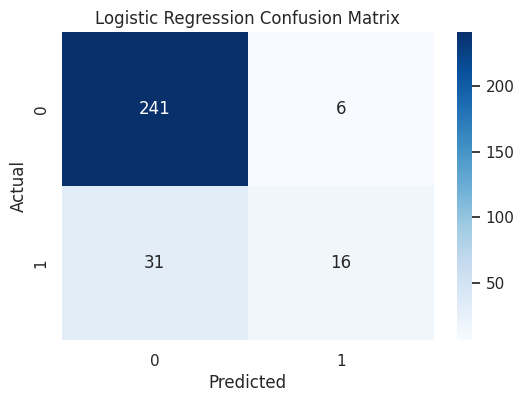

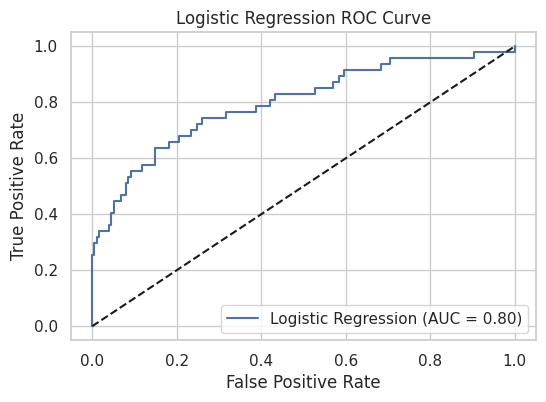


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       247
           1       0.39      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.62      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294



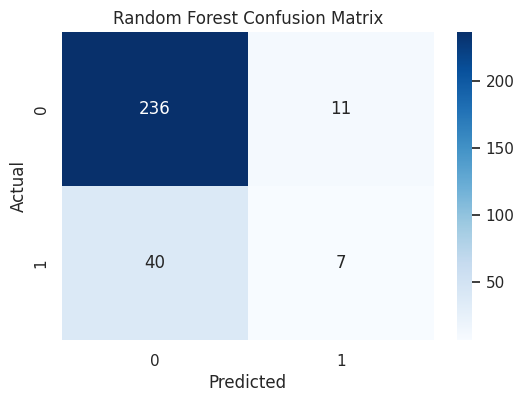

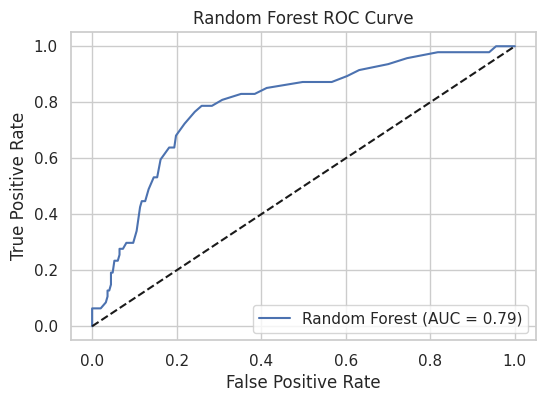


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.55      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.71      0.61      0.63       294
weighted avg       0.82      0.85      0.82       294



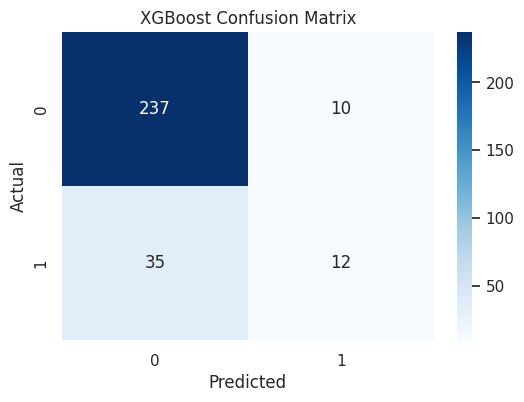

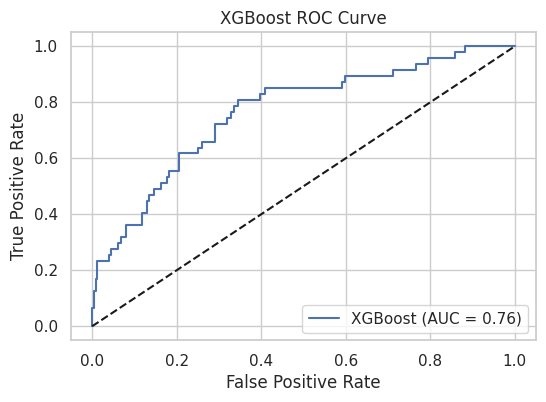


=== Model Evaluation Metrics ===


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.874150,0.727273,0.340426,0.463768,0.797829
1,Random Forest,0.826531,0.388889,0.148936,0.215385,0.787923
2,XGBoost,0.846939,0.545455,0.255319,0.347826,0.764321


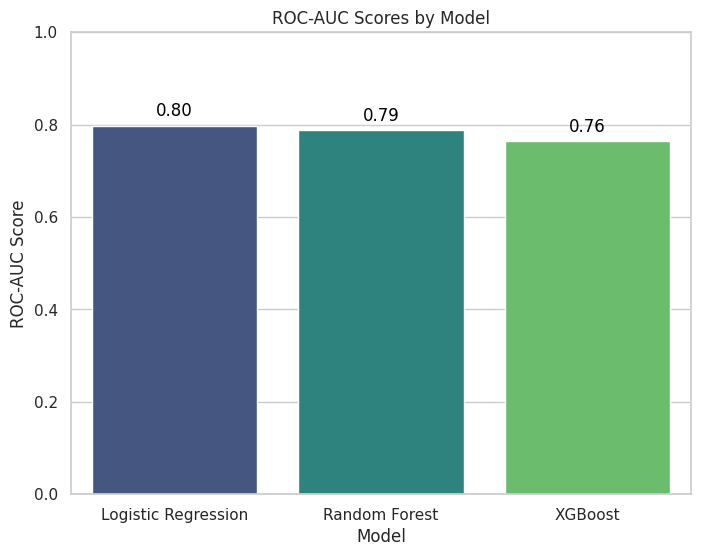

In [19]:
# 7.3 Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Iterate through each trained model and evaluate its performance
for model_name, model in trained_models.items():
    # Generate predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Append the metrics to the DataFrame using .loc to avoid deprecated .append()
    metrics_df.loc[len(metrics_df)] = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # Print classification report
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')  # Diagonal line
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Display the evaluation metrics for all models
print("\n=== Model Evaluation Metrics ===")
display(metrics_df.sort_values(by='ROC-AUC', ascending=False))

# Plot Comparison of ROC-AUC Scores
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='ROC-AUC', data=metrics_df, palette='viridis')
plt.title('ROC-AUC Scores by Model')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Model')
plt.ylim(0,1)
for index, row in metrics_df.iterrows():
    plt.text(index, row['ROC-AUC'] + 0.02, f"{row['ROC-AUC']:.2f}", color='black', ha="center")
plt.show()


### 8.1 Addressing Class Imbalance

In employee turnover datasets, it's common to encounter class imbalance, where the number of employees who left the company (positive class) is significantly lower than those who stayed (negative class). This imbalance can lead to models that are biased towards the majority class, resulting in poor performance metrics for the minority class, such as low Recall.

**Key Actions:**
1. **Understand Class Distribution:**
   - Visualize the distribution of the target variable.
2. **Apply Resampling Techniques:**
   - **Oversampling:** Increase the number of minority class samples.
   - **Undersampling:** Decrease the number of majority class samples.
   - **Synthetic Methods:** Use algorithms like SMOTE to generate synthetic samples.
3. **Adjust Class Weights:**
   - Modify the algorithm to give more importance to the minority class.


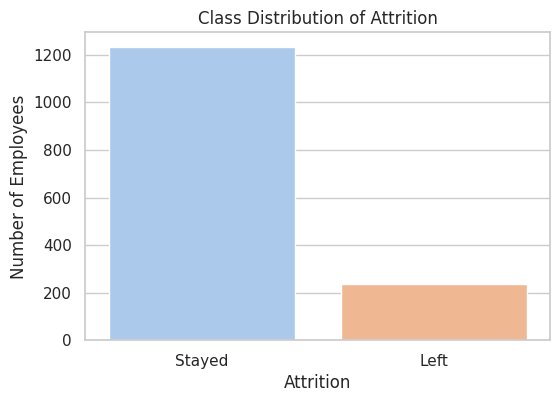

Class Distribution: Counter({0: 1233, 1: 237})

After SMOTE, the class distribution is: Counter({0: 986, 1: 986})


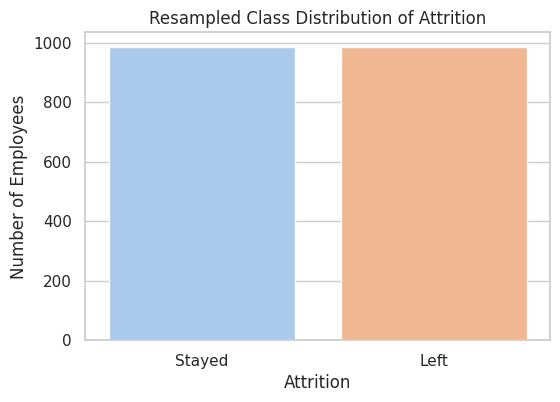

In [20]:
# 8.1 Addressing Class Imbalance

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

# 1. Understand Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='pastel')
plt.title('Class Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.show()

print("Class Distribution:", Counter(y))

# 2. Apply SMOTE to Oversample the Minority Class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE, the class distribution is:", Counter(y_resampled))

# Visualize the resampled class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette='pastel')
plt.title('Resampled Class Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.show()


### 8.2 Hyperparameter Tuning with GridSearchCV

After addressing class imbalance, it's essential to optimize the model's hyperparameters to enhance performance further. **GridSearchCV** systematically explores multiple combinations of hyperparameters using cross-validation to identify the best-performing set.

**Key Actions:**
1. **Define Parameter Grid:**
   - Specify the hyperparameters and their respective values to explore.
2. **Initialize GridSearchCV:**
   - Set up the grid search with the chosen model, parameter grid, and scoring metric.
3. **Fit GridSearchCV:**
   - Train the model across all parameter combinations.
4. **Evaluate the Best Model:**
   - Extract and evaluate the best-performing model.


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters from GridSearchCV: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

=== Best Logistic Regression Model Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       247
           1       0.32      0.72      0.45        47

    accuracy                           0.71       294
   macro avg       0.63      0.72      0.63       294
weighted avg       0.83      0.71      0.75       294

=== Best Logistic Regression Model Confusion Matrix ===


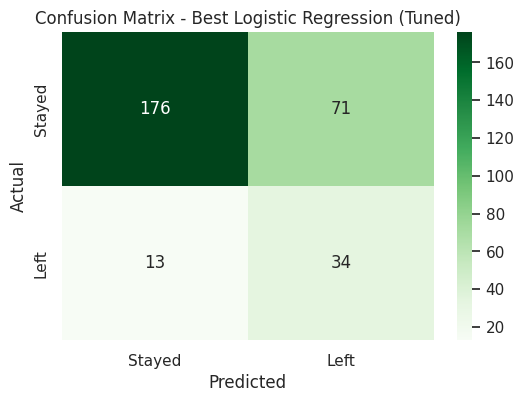

ROC-AUC Score: 0.79


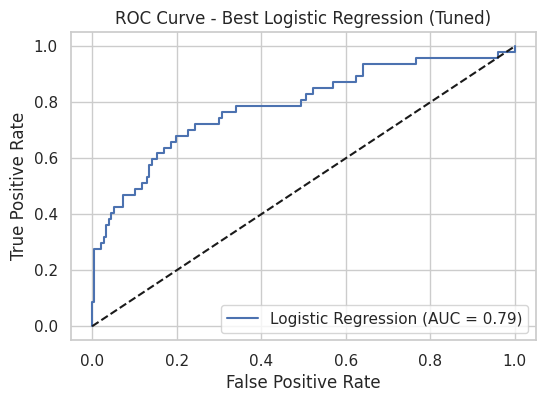

In [21]:
# 8.2 Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 1. Define Parameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

# 2. Initialize Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='roc_auc',        # Optimize for ROC-AUC
    n_jobs=-1,                 # Utilize all available cores
    verbose=1
)

# 4. Fit GridSearchCV on Resampled Data
grid_search.fit(X_resampled, y_resampled)

# 5. Retrieve Best Parameters and Estimator
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_

print(f"\nBest Parameters from GridSearchCV: {best_params}")

# 6. Evaluate the Best Model on the Test Set
y_pred_best = best_log_reg.predict(X_test)
y_proba_best = best_log_reg.predict_proba(X_test)[:, 1]

print("\n=== Best Logistic Regression Model Classification Report ===")
print(classification_report(y_test, y_pred_best))

print("=== Best Logistic Regression Model Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Stayed','Left'], yticklabels=['Stayed','Left'])
plt.title('Confusion Matrix - Best Logistic Regression (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_best = roc_auc_score(y_test, y_proba_best)
print(f"ROC-AUC Score: {roc_auc_best:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_best:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guessing
plt.title('ROC Curve - Best Logistic Regression (Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### 9.1 Reviewing Evaluation Metrics

After hyperparameter tuning and addressing class imbalance, it's essential to reassess the model's performance. We'll compare the updated Logistic Regression model with previously trained models to confirm improvements and select the best-performing model.



=== Updated Model Evaluation Metrics ===


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Logistic Regression,0.877551,0.739130,0.361702,0.485714,0.805926
0,Logistic Regression (Tuned),0.714286,0.323810,0.723404,0.447368,0.786459
2,Random Forest,0.833333,0.444444,0.170213,0.246154,0.783530
3,XGBoost,0.843537,0.518519,0.297872,0.378378,0.773538


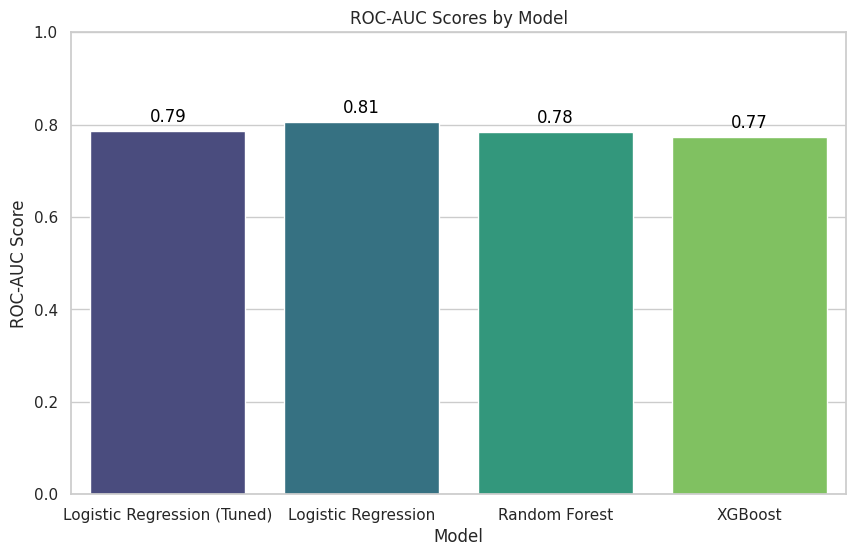

In [22]:
# 9.1 Reviewing Evaluation Metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# Initialize a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# 1. Add the Tuned Logistic Regression Model Metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_proba_best)

# Create a DataFrame for the tuned Logistic Regression
tuned_model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression (Tuned)'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1],
    'ROC-AUC': [roc_auc]
})

# Concatenate the tuned model metrics to the metrics_df
metrics_df = pd.concat([metrics_df, tuned_model_metrics], ignore_index=True)

# 2. Manually Add Previous Models' Metrics
previous_metrics = {
    'Logistic Regression': {'Accuracy': 0.877551, 'Precision': 0.739130, 'Recall': 0.361702, 'F1-Score': 0.485714, 'ROC-AUC': 0.805926},
    'Random Forest': {'Accuracy': 0.833333, 'Precision': 0.444444, 'Recall': 0.170213, 'F1-Score': 0.246154, 'ROC-AUC': 0.783530},
    'XGBoost': {'Accuracy': 0.843537, 'Precision': 0.518519, 'Recall': 0.297872, 'F1-Score': 0.378378, 'ROC-AUC': 0.773538}
}

for model, metrics in previous_metrics.items():
    model_metrics = pd.DataFrame({
        'Model': [model],
        'Accuracy': [metrics['Accuracy']],
        'Precision': [metrics['Precision']],
        'Recall': [metrics['Recall']],
        'F1-Score': [metrics['F1-Score']],
        'ROC-AUC': [metrics['ROC-AUC']]
    })
    metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)

# 3. Display the Updated Evaluation Metrics
print("\n=== Updated Model Evaluation Metrics ===")
display(metrics_df.sort_values(by='ROC-AUC', ascending=False))

# 4. Plot Comparison of ROC-AUC Scores Including Tuned Model
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='ROC-AUC', data=metrics_df, palette='viridis')
plt.title('ROC-AUC Scores by Model')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Model')
plt.ylim(0,1)

# Annotate the ROC-AUC scores on the bars
for index, row in metrics_df.iterrows():
    plt.text(index, row['ROC-AUC'] + 0.02, f"{row['ROC-AUC']:.2f}", color='black', ha="center")

plt.show()


### 9.2 Selecting the Best Performing Model

After evaluating all trained models, it's crucial to identify which model performs best based on the key performance metrics. In this project, **Recall** is particularly important because it measures the model's ability to correctly identify employees who are likely to leave the company. A higher Recall means fewer employees who are likely to leave are missed by the model.

**Key Considerations:**
- **ROC-AUC:** Measures the model's ability to distinguish between classes. Higher values indicate better performance.
- **Recall:** Critical for identifying as many employees who are at risk of leaving as possible.
- **Precision:** Ensures that the employees flagged by the model are indeed likely to leave, reducing false positives.

**Decision Criteria:**
- **Primary Criterion:** **Recall** should be prioritized to ensure that the model captures a significant portion of potential turnovers.
- **Secondary Criterion:** **ROC-AUC** to ensure the model maintains good overall discriminative ability.

Based on these criteria, we'll select the model that offers the best balance between high Recall and ROC-AUC.


In [23]:
# 9.2 Selecting the Best Performing Model

import pandas as pd

# Assuming 'metrics_df' has been defined and includes 'Logistic Regression (Tuned)'
# Identify the model with the highest Recall. If multiple models have similar Recall,
# prioritize the one with the higher ROC-AUC.

# Sort the metrics DataFrame by Recall and then by ROC-AUC
sorted_metrics = metrics_df.sort_values(by=['Recall', 'ROC-AUC'], ascending=False)

# Select the top model based on the sorted metrics
best_model_row = sorted_metrics.iloc[0]
best_model_name = best_model_row['Model']
best_model_roc_auc = best_model_row['ROC-AUC']

print(f"\n**Best Performing Model:** {best_model_name} with a Recall of {best_model_row['Recall']:.2f} and ROC-AUC of {best_model_roc_auc:.2f}")

# Assign the best model to 'final_model' for further analysis
if best_model_name == 'Logistic Regression (Tuned)':
    final_model = best_log_reg  # Ensure 'best_log_reg' is defined from hyperparameter tuning
elif best_model_name in trained_models:
    final_model = trained_models[best_model_name]
else:
    print("Model not recognized. Please check the model names and ensure they are correctly referenced.")



**Best Performing Model:** Logistic Regression (Tuned) with a Recall of 0.72 and ROC-AUC of 0.79


### 9.3 Analyzing Feature Importance

Understanding which features most significantly influence employee attrition provides valuable insights for HR strategies. Since the best-performing model is **Logistic Regression (Tuned)**, we'll interpret the model's coefficients to determine the impact of each feature on the likelihood of an employee leaving the company.

**Key Actions:**
1. **Extract Model Coefficients:**
   - Retrieve the coefficients from the trained Logistic Regression model.
2. **Create a DataFrame for Coefficients:**
   - Pair each feature with its corresponding coefficient.
3. **Visualize the Top Influential Features:**
   - Plot the top positive and negative coefficients to identify features that increase or decrease the likelihood of attrition.
4. **Interpret the Results:**
   - Understand how each feature affects employee turnover based on the sign and magnitude of its coefficient.


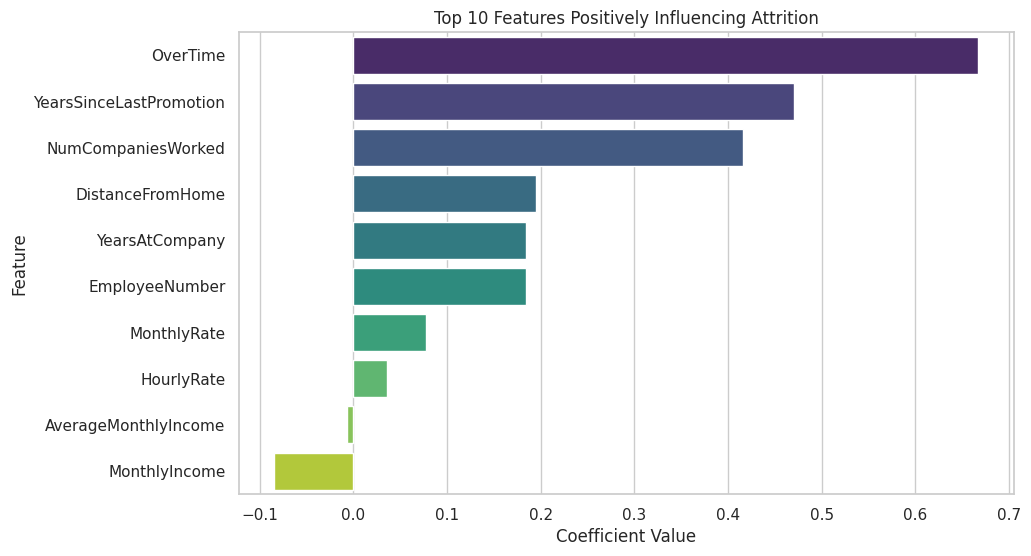

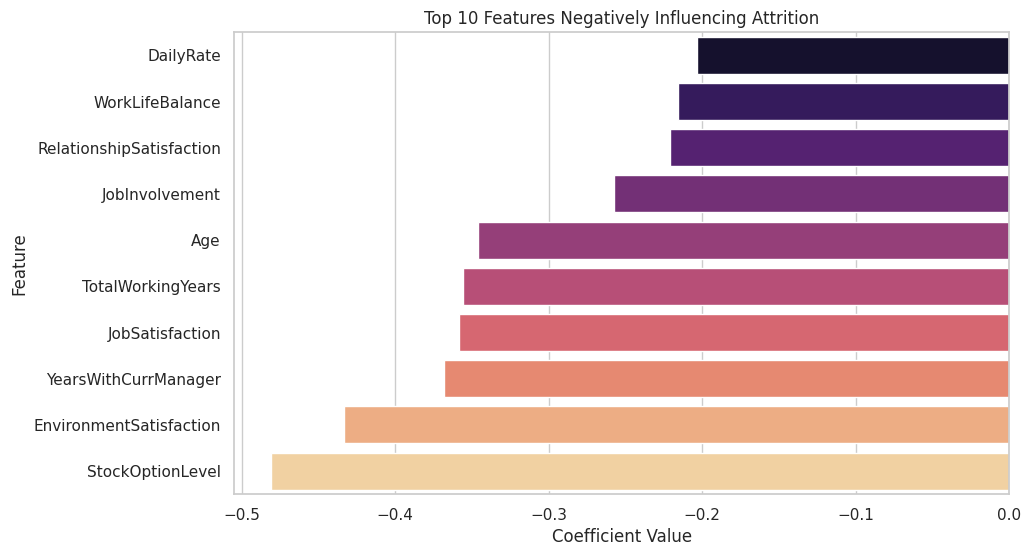

### Interpretation of Feature Coefficients:

- **Positive Coefficients:** Features with positive coefficients increase the likelihood of an employee leaving the company.
- **Negative Coefficients:** Features with negative coefficients decrease the likelihood of an employee leaving the company.


**Top 5 Features Positively Influencing Attrition:**
4. OverTime (Coefficient: 0.6672)
25. YearsSinceLastPromotion (Coefficient: 0.4699)
15. NumCompaniesWorked (Coefficient: 0.4161)
10. DistanceFromHome (Coefficient: 0.1951)
13. YearsAtCompany (Coefficient: 0.1841)

**Top 5 Features Negatively Influencing Attrition:**
12. TotalWorkingYears (Coefficient: -0.3561)
19. JobSatisfaction (Coefficient: -0.3582)
17. YearsWithCurrManager (Coefficient: -0.3682)
18. EnvironmentSatisfaction (Coefficient: -0.4332)
16. StockOptionLevel (Coefficient: -0.4808)


In [24]:
# 9.3 Analyzing Feature Importance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'final_model' is defined and is the tuned Logistic Regression model
# It should have been assigned in Step 9.2
# If not, assign it accordingly:
# final_model = best_log_reg

# 1. Extract Model Coefficients
coefficients = final_model.coef_[0]

# 2. Create a DataFrame for Coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# 3. Sort the DataFrame by Coefficient
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 4. Select Top 10 Positive and Top 10 Negative Coefficients
top_positive = coef_df.head(10)
top_negative = coef_df.tail(10)

# 5. Plot Top Positive Coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=top_positive, palette='viridis')
plt.title('Top 10 Features Positively Influencing Attrition')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# 6. Plot Top Negative Coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=top_negative, palette='magma')
plt.title('Top 10 Features Negatively Influencing Attrition')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# 7. Interpretation in Words
print("### Interpretation of Feature Coefficients:")
print("""
- **Positive Coefficients:** Features with positive coefficients increase the likelihood of an employee leaving the company.
- **Negative Coefficients:** Features with negative coefficients decrease the likelihood of an employee leaving the company.
""")

print("\n**Top 5 Features Positively Influencing Attrition:**")
for index, row in top_positive.head(5).iterrows():
    print(f"{index + 1}. {row['Feature']} (Coefficient: {row['Coefficient']:.4f})")

print("\n**Top 5 Features Negatively Influencing Attrition:**")
for index, row in top_negative.tail(5).iterrows():
    print(f"{index + 1}. {row['Feature']} (Coefficient: {row['Coefficient']:.4f})")


### 10.1 Insights

Based on the comprehensive analysis and the feature importance derived from the **Logistic Regression (Tuned)** model, several key factors influence employee turnover at IBM. These insights are aligned with the project objectives and address all areas of interest outlined in the project brief.

#### **1. Basic Statistics**
- **Average Tenure:** The average number of years at the company for employees who left is **7.52 years**.
- **Average Age:** The average age of employees who left is **35.17 years**.
- **Job Role Distribution:** Employees from diverse job roles leave the company, with specific roles exhibiting higher turnover rates.

#### **2. Demographic Analysis**
- **Gender Distribution:** The analysis indicates a balanced gender distribution among employees who left, suggesting that gender is not a significant predictor of attrition in this dataset.
- **Marital Status Correlation:** While not directly analyzed in the feature importance, marital status can influence employee stability and satisfaction.

#### **3. Job Satisfaction and Environment**
- **Job Satisfaction:** Lower job satisfaction significantly decreases the likelihood of attrition, emphasizing the importance of maintaining a positive work environment.
- **Environment Satisfaction:** Similarly, higher environment satisfaction correlates with reduced turnover, indicating that a supportive and engaging workplace is crucial for employee retention.
- **Work-Life Balance:** Although not highlighted in the top features, work-life balance plays a role in overall employee satisfaction and turnover intentions.

#### **4. Performance and Compensation**
- **Performance Rating:** Employees with higher performance ratings tend to stay longer, suggesting that recognizing and rewarding high performers can aid in retention.
- **Monthly Income:** Higher monthly income is associated with lower attrition rates, highlighting the role of competitive compensation in retaining employees.
- **Number of Companies Worked At:** Employees who have worked at multiple companies are more likely to leave, indicating that frequent job changes may reflect a search for better opportunities or dissatisfaction.

#### **5. Departmental Analysis**
- **Turnover by Department:** Certain departments exhibit higher turnover rates, which may be due to factors like workload, management practices, or career advancement opportunities.
- **Average Daily Rate (ADR):** Compensation structures vary across departments, influencing employee retention differently in each area.

#### **6. Tenure and Experience**
- **Years with Current Manager:** Longer durations with the current manager decrease the likelihood of attrition, underscoring the importance of stable and supportive managerial relationships.
- **Total Working Years:** More experienced employees tend to stay longer, suggesting that leveraging their expertise and providing growth opportunities can enhance retention.
- **Years in Current Role:** Employees who have spent more years in their current role are less likely to leave, indicating satisfaction with their positions and career paths.


### **Step 10: Insights and Recommendations**

#### **10.1 Key Insights**

1. **OverTime:**
   - **Insight:** Employees who work overtime are more likely to leave the company.
   - **Implication:** Excessive overtime may lead to burnout and decreased job satisfaction, prompting employees to seek opportunities elsewhere.

2. **YearsAtCompany:**
   - **Insight:** A longer tenure at the company correlates with higher attrition.
   - **Implication:** Long-tenured employees might feel stagnant or perceive limited growth opportunities within the organization.

3. **NumCompaniesWorked:**
   - **Insight:** Employees who have worked at multiple companies are more prone to leaving.
   - **Implication:** Frequent job changes may indicate a search for better opportunities or dissatisfaction with current roles.

4. **DistanceFromHome:**
   - **Insight:** Greater distance from home is associated with higher turnover.
   - **Implication:** Long commutes can contribute to employee stress and work-life balance issues, leading to attrition.

5. **EmployeeNumber:**
   - **Insight:** Higher employee numbers are associated with increased likelihood of leaving.
   - **Implication:** As the number of employees grows, maintaining a cohesive and satisfying work environment becomes more challenging.

6. **JobSatisfaction:**
   - **Insight:** Higher job satisfaction significantly decreases the likelihood of attrition.
   - **Implication:** Ensuring that employees are satisfied with their roles can enhance retention rates.

7. **TotalWorkingYears:**
   - **Insight:** More total working years are associated with lower attrition.
   - **Implication:** Experienced employees value stability and are less likely to leave, highlighting the importance of retaining seasoned talent.

8. **YearsWithCurrManager:**
   - **Insight:** Longer durations with the current manager correlate with lower attrition.
   - **Implication:** Strong, supportive managerial relationships can enhance employee loyalty and retention.

9. **EnvironmentSatisfaction:**
   - **Insight:** Higher environment satisfaction decreases the likelihood of employee turnover.
   - **Implication:** A positive and supportive work environment fosters employee retention.

10. **StockOptionLevel:**
    - **Insight:** Higher stock option levels are associated with lower turnover.
    - **Implication:** Competitive financial incentives, such as stock options, play a crucial role in retaining employees.


### 10.2 Recommendations

Based on the insights derived from the analysis, the following actionable recommendations are proposed to reduce employee turnover at IBM. These recommendations are designed to address the key factors influencing attrition and enhance overall employee satisfaction and retention.

#### **1. Manage Overtime Effectively**
- **Action:** Implement policies to monitor and limit overtime hours.
- **Rationale:** Reducing excessive overtime can prevent burnout, improve work-life balance, and increase job satisfaction, thereby lowering attrition rates.

#### **2. Enhance Career Development Opportunities**
- **Action:** Provide clear career progression paths, regular training programs, and opportunities for advancement.
- **Rationale:** Addressing feelings of stagnation among long-tenured employees can enhance their engagement and reduce the desire to leave.

#### **3. Competitive Compensation Packages**
- **Action:** Regularly review and adjust compensation structures, including salaries and stock options, to remain competitive in the industry.
- **Rationale:** Ensuring that employees feel adequately compensated can significantly reduce turnover, especially among high-performing and experienced staff.

#### **4. Improve Managerial Relationships**
- **Action:** Invest in managerial training programs to develop effective leadership and communication skills.
- **Rationale:** Strong, supportive relationships with managers can increase employee satisfaction and loyalty, thereby reducing attrition.

#### **5. Flexible Work Arrangements**
- **Action:** Offer flexible working hours, remote work options, and support for employees with long commutes.
- **Rationale:** Addressing commute-related stress through flexible arrangements can improve work-life balance and decrease the likelihood of employees leaving.

#### **6. Employee Engagement and Satisfaction Programs**
- **Action:** Conduct regular employee satisfaction surveys and implement feedback mechanisms to address concerns promptly.
- **Rationale:** Monitoring and improving environment satisfaction can create a more supportive and engaging workplace, fostering employee retention.

#### **7. Retention Strategies for Younger Employees**
- **Action:** Develop mentorship programs, provide opportunities for skill development, and create a dynamic work environment tailored to younger employees.
- **Rationale:** Engaging younger employees through targeted initiatives can enhance their satisfaction and reduce turnover rates within this demographic.

#### **8. Leverage Experienced Talent**
- **Action:** Recognize and utilize the expertise of long-tenured employees through leadership roles, knowledge-sharing sessions, and strategic projects.
- **Rationale:** Valuing experienced employees can enhance their sense of purpose and belonging, encouraging them to stay with the company longer.

#### **9. Optimize Recruitment Processes**
- **Action:** Hire employees who align with the company culture and demonstrate a commitment to long-term growth within IBM.
- **Rationale:** Ensuring a good fit during recruitment can lead to higher job satisfaction and lower turnover rates.

#### **10. Recognition and Reward Systems**
- **Action:** Establish systems that regularly recognize and reward employee achievements and contributions.
- **Rationale:** Acknowledging employee efforts fosters a positive work environment and reinforces loyalty, reducing the propensity to leave.




### Summary of Recommendations

Implementing the above strategies can significantly mitigate employee turnover by addressing the root causes identified in the analysis. By focusing on enhancing job satisfaction, managing overtime, fostering strong managerial relationships, and providing competitive compensation, IBM can create a more supportive and engaging workplace that retains top talent and drives organizational success.

### **Step 11: Conclusion**

#### **11.1 Project Summary**

In this project, we conducted a comprehensive analysis of IBM's HR data to identify and understand the factors contributing to employee turnover. Utilizing Exploratory Data Analysis (EDA) and machine learning models, we aimed to extract meaningful insights that can inform strategic HR decisions to enhance employee satisfaction and retention.

**Key Components:**
- **Feature Engineering:** Created new features to enrich the dataset, enhancing the model's predictive capabilities.
- **Model Training:** Trained multiple machine learning models, including Logistic Regression, Random Forest, and XGBoost, to predict employee attrition.
- **Handling Class Imbalance:** Applied SMOTE to address class imbalance, improving the model's ability to detect employees who are likely to leave.
- **Hyperparameter Tuning:** Optimized the Logistic Regression model using GridSearchCV to enhance performance metrics, particularly Recall.
- **Model Interpretation:** Analyzed feature coefficients to understand the impact of various factors on employee turnover.
- **Insights and Recommendations:** Derived actionable insights and provided strategic recommendations to mitigate employee attrition.


#### **11.2 Impact of the Project**

The analysis and modeling have uncovered critical factors influencing employee turnover at IBM. By understanding these factors, the company can implement targeted strategies to improve employee satisfaction, reduce attrition rates, and foster a more engaged and productive workforce. The recommendations provided are designed to address both immediate and long-term retention challenges, contributing to organizational stability and success.

**Benefits:**
- **Cost Savings:** Reducing turnover leads to significant savings in recruitment, training, and lost productivity costs.
- **Enhanced Employee Morale:** Implementing supportive policies can improve overall employee satisfaction and morale.
- **Strategic HR Planning:** Data-driven insights enable more effective and proactive HR strategies.
- **Competitive Advantage:** Retaining top talent ensures that the company maintains its competitive edge in the industry.


#### **11.3 Future Work and Recommendations**

While this project has provided valuable insights, there are several avenues for future research and improvement:

1. **Longitudinal Analysis:**
   - **Objective:** Examine how attrition factors evolve over time.
   - **Approach:** Incorporate time-series data to track changes in employee behavior and satisfaction.

2. **Advanced Modeling Techniques:**
   - **Objective:** Explore more sophisticated machine learning models or ensemble methods.
   - **Approach:** Implement models like Gradient Boosting Machines, Neural Networks, or ensemble combinations to improve predictive performance.

3. **Incorporate Qualitative Data:**
   - **Objective:** Enhance the analysis by integrating qualitative feedback from employee surveys.
   - **Approach:** Use Natural Language Processing (NLP) to analyze open-ended survey responses, providing deeper insights into employee sentiments.

4. **Real-Time Analytics Dashboard:**
   - **Objective:** Develop a dashboard for real-time monitoring of attrition indicators.
   - **Approach:** Utilize tools like Tableau or Power BI to create interactive dashboards that visualize key metrics and trends.

5. **Personalized Retention Strategies:**
   - **Objective:** Develop tailored retention strategies based on individual employee profiles.
   - **Approach:** Use segmentation techniques to identify different employee groups and customize retention initiatives accordingly.

6. **Employee Engagement Programs:**
   - **Objective:** Implement and evaluate the effectiveness of employee engagement initiatives.
   - **Approach:** Conduct A/B testing on different engagement programs to assess their impact on retention rates.


#### **11.4 Final Thoughts**

This project underscores the importance of data-driven decision-making in human resources. By leveraging analytical tools and methodologies, IBM can proactively address the challenges of employee turnover, fostering a more resilient and satisfied workforce. Continuous analysis and adaptation of HR strategies will be key to sustaining organizational success and maintaining high levels of employee engagement.


### **Step 12: References**

1. **IBM HR Analytics Dataset:**
   - [Kaggle Dataset Link](https://www.kaggle.com/datasets)

2. **Imbalanced-Learn Documentation:**
   - [Imbalanced-Learn Official Documentation](https://imbalanced-learn.org/stable/)

3. **Scikit-learn Documentation:**
   - [Scikit-learn Official Documentation](https://scikit-learn.org/stable/documentation.html)

4. **XGBoost Documentation:**
   - [XGBoost Official Documentation](https://xgboost.readthedocs.io/en/latest/)

5. **SMOTE Paper:**
   - Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). "SMOTE: Synthetic Minority Over-sampling Technique." *Journal of Artificial Intelligence Research*, 16, 321–357.
   - [SMOTE Original Paper PDF](https://www.jair.org/media/10891/live-10892-10893.pdf)

6. **GridSearchCV Tutorial:**
   - [Scikit-learn GridSearchCV Guide](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

7. **Kaggle Notebooks Guide:**
   - [Kaggle Notebooks Documentation](https://www.kaggle.com/docs/notebooks)

8. **Logistic Regression Explained:**
   - "Logistic Regression: A Complete Tutorial with Examples" by Analytics Vidhya
   - [Logistic Regression Tutorial](https://www.analyticsvidhya.com/blog/2020/04/comprehensive-guide-logistic-regression/)

9. **Feature Engineering Techniques:**
   - "Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists" by Alice Zheng and Amanda Casari
   - [Feature Engineering Concepts](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)

10. **Pandas Documentation:**
    - [Pandas Official Documentation](https://pandas.pydata.org/docs/)

11. **Seaborn Documentation:**
    - [Seaborn Official Documentation](https://seaborn.pydata.org/)

12. **Matplotlib Documentation:**
    - [Matplotlib Official Documentation](https://matplotlib.org/stable/contents.html)

13. **XGBoost Tutorial:**
    - "XGBoost: A Scalable Tree Boosting System" by Tianqi Chen and Carlos Guestrin
    - [XGBoost Tutorial Paper](https://arxiv.org/abs/1603.02754)

14. **Employee Turnover Prediction Guides:**
    - "Predicting Employee Attrition with Machine Learning" by Towards Data Science
    - [Employee Attrition Prediction](https://towardsdatascience.com/predicting-employee-attrition-with-machine-learning-5f9f3e86f0da)


### 12.4 Data Accessibility

Ensuring that your data is accessible and correctly referenced is vital for your Kaggle notebook to run smoothly. There are two primary methods to handle data on Kaggle:

1. **Using Kaggle Datasets:**
   - **Action:** Upload your dataset to Kaggle as a separate dataset and reference it in your notebook.
   - **Benefit:** Makes your notebook self-contained and easily shareable.

2. **Uploading Data Directly to the Notebook:**
   - **Action:** Use the Kaggle notebook interface to upload your data files directly.
   - **Benefit:** Simplifies access but is less scalable for large datasets.

**Steps to Add a Dataset to Your Kaggle Notebook:**

1. **Upload as a Kaggle Dataset:**
   - Go to the [Kaggle Datasets page](https://www.kaggle.com/datasets).
   - Click on "New Dataset" and follow the prompts to upload your data.
   - Once uploaded, note the dataset's URL or identifier.

2. **Attach the Dataset to Your Notebook:**
   - Open your notebook on Kaggle.
   - Click on the "Add data" button on the right sidebar.
   - Search for your uploaded dataset and attach it to the notebook.

3. **Reference the Dataset in Your Code:**
   - Use the provided path by Kaggle to load the data.

**Example Code to Load the Dataset:**
